# ** Will be implemented in future if required
### Right now this notebook will be used for checking the uploaded model to IBM object store

## Download model and data

In [ ]:
# The code was removed by Watson Studio for sharing.

In [1]:
from ibm_botocore.client import Config
import ibm_boto3
def download_file_cos(credentials,local_file_name,key):  
    cos = ibm_boto3.client(service_name='s3',
    ibm_api_key_id=credentials['IBM_API_KEY_ID'],
    ibm_service_instance_id=credentials['IAM_SERVICE_ID'],
    ibm_auth_endpoint=credentials['IBM_AUTH_ENDPOINT'],
    config=Config(signature_version='oauth'),
    endpoint_url=credentials['ENDPOINT'])
    try:
        res=cos.download_file(Bucket=credentials['BUCKET'],Key=key,Filename=local_file_name)
    except Exception as e:
        print(Exception, e)
    else:
        print('File Downloaded')

In [2]:
!rm connectivity_model_nn_03.h5
!ls

10390.png      13568.png   24529.png	6325.png   69319.png  887.png
106705.png     137201.png  24547.png	6329.png   74209.png  9237.png
11269.png      140746.png  24823.png	6335.png   74348.png  931.png
1146.png       143710.png  3283.png	6360.png   7732.png   9964.png
11473.png      144018.png  33558.png	6375.png   77628.png  996.png
11638.png      14917.png   5206.png	6386.png   783.png    BASKVILL.TTF
11646.png      176.png	   5365279.png	6393.png   7845.png   data_raw.csv
12228.png      177.png	   552549.png	6410.png   784.png    data_training.csv
12246.png      18196.png   566545.png	6569.png   7929.png   pairs_dict.pkl
123257.png     222.png	   5962.png	66074.png  7952.png
123502.png     240.png	   6115.png	66978.png  8033.png
127602.png     241.png	   6319.png	67180.png  8053.png
135504501.png  243.png	   6324.png	674.png    8058.png


In [3]:
download_file_cos(credentials_1, 'connectivity_model_nn_03.h5', 'connectivity_model_nn_03.h5')
!ls

File Downloaded
10390.png      140746.png  33558.png	6393.png   7929.png
106705.png     143710.png  5206.png	6410.png   7952.png
11269.png      144018.png  5365279.png	6569.png   8033.png
1146.png       14917.png   552549.png	66074.png  8053.png
11473.png      176.png	   566545.png	66978.png  8058.png
11638.png      177.png	   5962.png	67180.png  887.png
11646.png      18196.png   6115.png	674.png    9237.png
12228.png      222.png	   6319.png	69319.png  931.png
12246.png      240.png	   6324.png	74209.png  9964.png
123257.png     241.png	   6325.png	74348.png  996.png
123502.png     243.png	   6329.png	7732.png   BASKVILL.TTF
127602.png     24529.png   6335.png	77628.png  connectivity_model_nn_03.h5
135504501.png  24547.png   6360.png	783.png    data_raw.csv
13568.png      24823.png   6375.png	7845.png   data_training.csv
137201.png     3283.png    6386.png	784.png    pairs_dict.pkl


In [4]:
download_file_cos(credentials_1, 'data_training.csv', 'data_training.csv')
!ls

File Downloaded
10390.png      140746.png  33558.png	6393.png   7929.png
106705.png     143710.png  5206.png	6410.png   7952.png
11269.png      144018.png  5365279.png	6569.png   8033.png
1146.png       14917.png   552549.png	66074.png  8053.png
11473.png      176.png	   566545.png	66978.png  8058.png
11638.png      177.png	   5962.png	67180.png  887.png
11646.png      18196.png   6115.png	674.png    9237.png
12228.png      222.png	   6319.png	69319.png  931.png
12246.png      240.png	   6324.png	74209.png  9964.png
123257.png     241.png	   6325.png	74348.png  996.png
123502.png     243.png	   6329.png	7732.png   BASKVILL.TTF
127602.png     24529.png   6335.png	77628.png  connectivity_model_nn_03.h5
135504501.png  24547.png   6360.png	783.png    data_raw.csv
13568.png      24823.png   6375.png	7845.png   data_training.csv
137201.png     3283.png    6386.png	784.png    pairs_dict.pkl


In [5]:
!head -10 data_training.csv

pairs_enc,distance,bond
0,1.5119999999999998,1
2,1.0940555607463451,1
2,1.0940439342183659,1
2,1.0940911982097288,1
2,2.1553485031428212,0
2,1.0940439342183659,1
2,1.0940911982097288,1
2,1.0940555607463451,1
2,1.0940439342183659,0


## Check model performance

In [5]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from keras.models import load_model
import pickle

Using TensorFlow backend.


In [11]:
tf.__version__

'1.13.1'

In [7]:
model_nn=tf.keras.models.load_model('connectivity_model_nn_03.h5',custom_objects=None,compile=True)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.


In [8]:
data_training=pd.read_csv('data_training.csv')

In [9]:
data_training.head()

,pairs_enc,distance,bond
0,0,1.512000,1
1,2,1.094056,1
2,2,1.094044,1
3,2,1.094091,1
4,2,2.155349,0


In [10]:
data_training.shape

(2222, 3)

In [11]:
y=data_training['bond']

In [12]:
x=data_training.drop('bond',axis=1)

In [13]:
x.head()

,pairs_enc,distance
0,0,1.512000
1,2,1.094056
2,2,1.094044
3,2,1.094091
4,2,2.155349


In [14]:
model_nn.evaluate(x,y)

2222/2222 [==============================] - 7s 3ms/sample - loss: nan - acc: 0.8740


[nan, 0.8739874]

# pairs_dict

In [2]:
# The code was removed by Watson Studio for sharing.

In [3]:
download_file_cos(credentials_2, 'pairs_dict.pkl', 'pairs_dict.pkl')

File Downloaded


In [6]:
with open('pairs_dict.pkl','rb') as f:
    pairs_dict=pickle.load(f)

In [7]:
pairs_dict

{'c_c': 0,
 'c_f': 1,
 'c_h': 2,
 'c_n': 3,
 'c_o': 4,
 'c_si': 5,
 'f_f': 6,
 'f_h': 7,
 'f_n': 8,
 'f_o': 9,
 'f_si': 10,
 'h_h': 11,
 'h_n': 12,
 'h_o': 13,
 'h_si': 14,
 'n_n': 15,
 'n_o': 16,
 'o_o': 17}

# Decision Boundary

## Initialize the workspace

In [2]:
# The code was removed by Watson Studio for sharing.

In [3]:
from ibm_botocore.client import Config
import ibm_boto3
def download_file_cos(credentials,local_file_name,key):  
    cos = ibm_boto3.client(service_name='s3',
    ibm_api_key_id=credentials['IBM_API_KEY_ID'],
    ibm_service_instance_id=credentials['IAM_SERVICE_ID'],
    ibm_auth_endpoint=credentials['IBM_AUTH_ENDPOINT'],
    config=Config(signature_version='oauth'),
    endpoint_url=credentials['ENDPOINT'])
    try:
        res=cos.download_file(Bucket=credentials['BUCKET'],Key=key,Filename=local_file_name)
    except Exception as e:
        print(Exception, e)
    else:
        print('File Downloaded')

In [4]:
!ls

In [5]:
download_file_cos(credentials_1, 'connectivity_model_nn_03.h5', 'connectivity_model_nn_03.h5')
download_file_cos(credentials_1, 'pairs_dict.pkl', 'pairs_dict.pkl')
!ls

File Downloaded
File Downloaded
connectivity_model_nn_03.h5  pairs_dict.pkl


In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from keras.models import load_model
import pickle

%matplotlib inline

In [7]:
tf.__version__

'1.13.1'

In [8]:
with open('pairs_dict.pkl','rb') as f:
    pairs_dict=pickle.load(f)

In [9]:
pairs_dict

{'c_c': 0,
 'c_f': 1,
 'c_h': 2,
 'c_n': 3,
 'c_o': 4,
 'c_si': 5,
 'f_f': 6,
 'f_h': 7,
 'f_n': 8,
 'f_o': 9,
 'f_si': 10,
 'h_h': 11,
 'h_n': 12,
 'h_o': 13,
 'h_si': 14,
 'n_n': 15,
 'n_o': 16,
 'o_o': 17}

In [10]:
model_nn=tf.keras.models.load_model('connectivity_model_nn_03.h5',custom_objects=None,compile=True)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.


##  C-H, C-C, C-N

In [16]:
num_points=1000
def decisionBoundary(pair):  
    data={}
    data['pair_enc']=[pairs_dict[pair]]*num_points
    data['distance']=np.linspace(0.1,3,1000)
    x=pd.DataFrame.from_dict(data)
    print(x.head())
    
    pred_prob=model_nn.predict(x)
    pred_class=model_nn.predict_classes(x)
    
    y=x.copy()
    y['pred_prob']=pred_prob
    y['pred_class']=pred_class
    print(y.head())
    
    plt.figure(figsize=(16,8))
    plt.plot(y['distance'],y['pred_prob'],'r')
    plt.plot(y['distance'],y['pred_class'],'b')
    plt.xlabel('{}({}) bond distance'.format(pair.upper(),pairs_dict[pair]))
    plt.ylabel('prob/class')
    plt.legend()

   pair_enc  distance
0         2  0.100000
1         2  0.102903
2         2  0.105806
3         2  0.108709
4         2  0.111612
   pair_enc  distance  pred_prob  pred_class
0         2  0.100000   0.001710           0
1         2  0.102903   0.001695           0
2         2  0.105806   0.001680           0
3         2  0.108709   0.001666           0
4         2  0.111612   0.001651           0


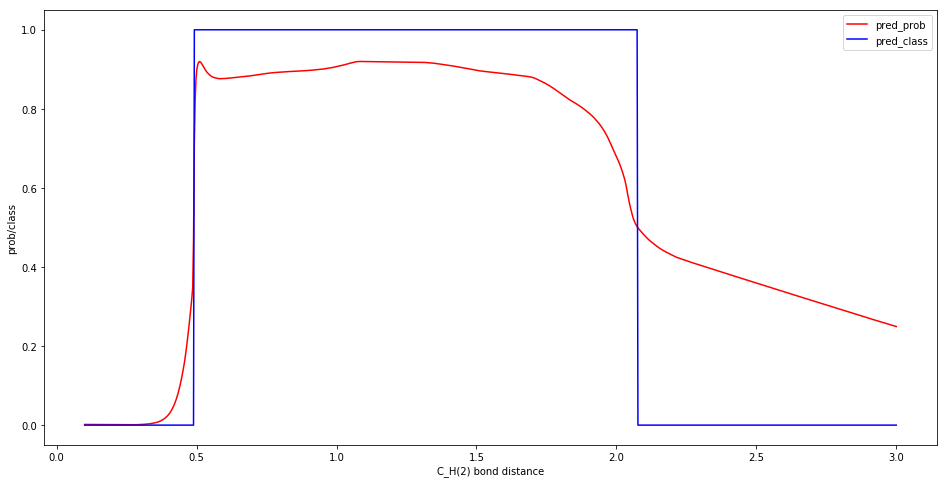

In [17]:
decisionBoundary('c_h')

   pair_enc  distance
0         0  0.100000
1         0  0.102903
2         0  0.105806
3         0  0.108709
4         0  0.111612
   pair_enc  distance  pred_prob  pred_class
0         0  0.100000   0.049411           0
1         0  0.102903   0.049232           0
2         0  0.105806   0.049053           0
3         0  0.108709   0.048875           0
4         0  0.111612   0.048698           0


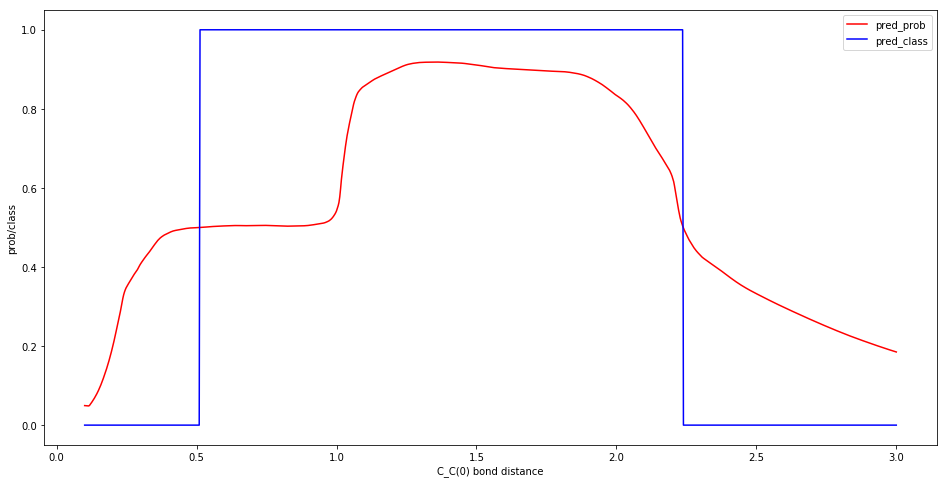

In [18]:
decisionBoundary('c_c')

   pair_enc  distance
0         3  0.100000
1         3  0.102903
2         3  0.105806
3         3  0.108709
4         3  0.111612
   pair_enc  distance  pred_prob  pred_class
0         3  0.100000   0.000238           0
1         3  0.102903   0.000243           0
2         3  0.105806   0.000248           0
3         3  0.108709   0.000254           0
4         3  0.111612   0.000259           0


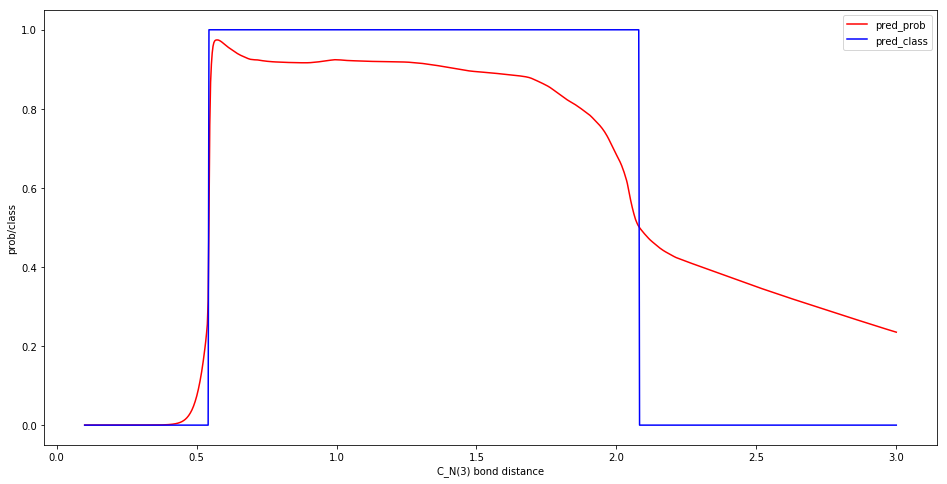

In [19]:
decisionBoundary('c_n')

   pair_enc  distance
0        12  0.100000
1        12  0.102903
2        12  0.105806
3        12  0.108709
4        12  0.111612
   pair_enc  distance  pred_prob  pred_class
0        12  0.100000   0.999998           1
1        12  0.102903   0.999998           1
2        12  0.105806   0.999998           1
3        12  0.108709   0.999998           1
4        12  0.111612   0.999998           1


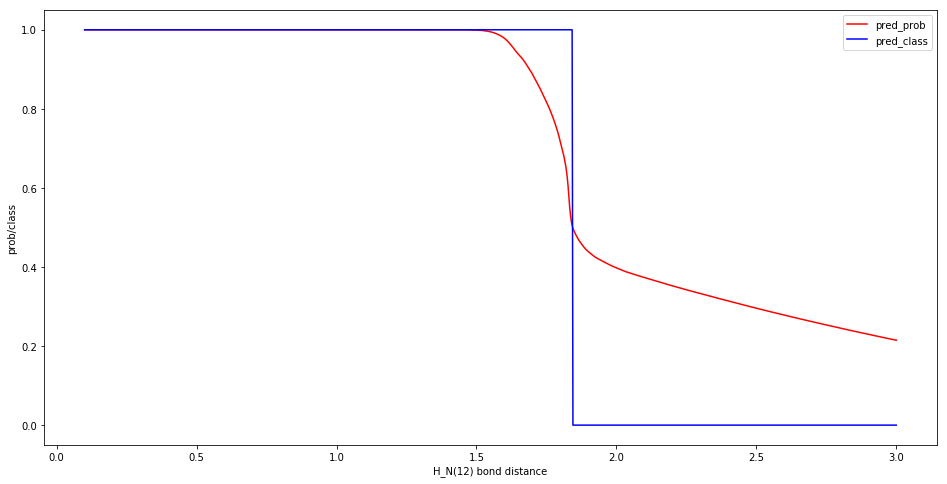

In [20]:
decisionBoundary('h_n')

   pair_enc  distance
0        11  0.100000
1        11  0.102903
2        11  0.105806
3        11  0.108709
4        11  0.111612
   pair_enc  distance  pred_prob  pred_class
0        11  0.100000   0.999991           1
1        11  0.102903   0.999991           1
2        11  0.105806   0.999991           1
3        11  0.108709   0.999991           1
4        11  0.111612   0.999991           1


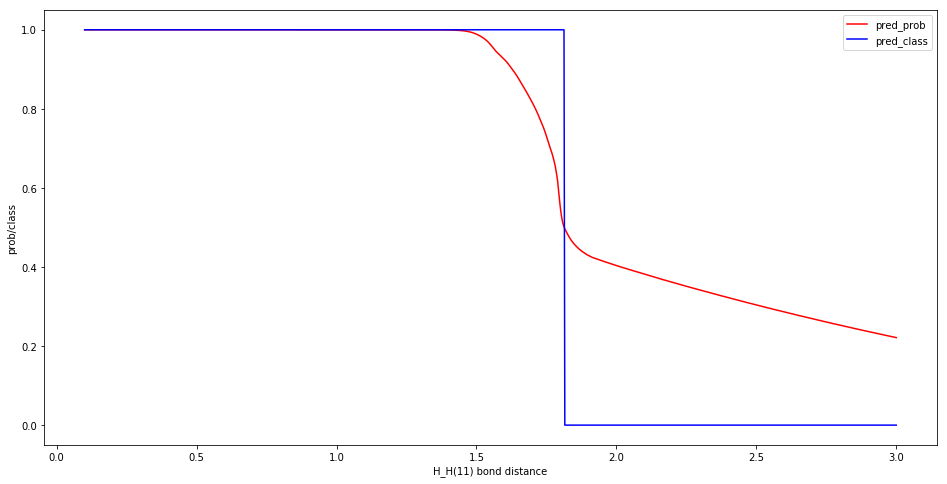

In [21]:
decisionBoundary('h_h')

   pair_enc  distance
0         4  0.100000
1         4  0.102903
2         4  0.105806
3         4  0.108709
4         4  0.111612
   pair_enc  distance  pred_prob  pred_class
0         4  0.100000   0.000396           0
1         4  0.102903   0.000407           0
2         4  0.105806   0.000419           0
3         4  0.108709   0.000432           0
4         4  0.111612   0.000445           0


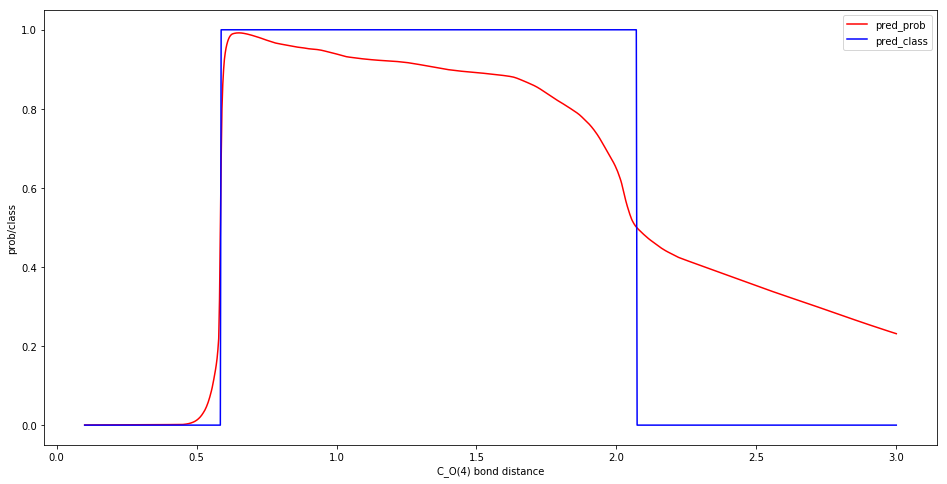

In [22]:
decisionBoundary('c_o')

In [ ]:
decisionBoundary('h_o')

   pair_enc  distance
0        13  0.100000
1        13  0.102903
2        13  0.105806
3        13  0.108709
4        13  0.111612
